In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from itertools import combinations

/Users/carolbarroco/Documents/RecomendSisKNN/NewVenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Data/MPBROCKMETAL_KGDataSet.csv")

In [4]:


X = df.iloc[:, 6:20]
y = df["track_genre"]
feature_names = X.columns



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

results_df = X_test.copy()
results_df["Actual"] = y_test.values
results_df["Predicted"] = y_pred

# results_df

Accuracy: 0.9746666666666667


In [5]:
importance = clf.feature_importances_
columns = X_train.columns

important_columns = pd.Series(importance, columns)
important_columns.sort_values()

mode                0.003004
explicit            0.005903
key                 0.009914
tempo               0.017521
duration_ms         0.020803
liveness            0.033789
danceability        0.040604
valence             0.045561
speechiness         0.053998
loudness            0.055708
instrumentalness    0.064666
energy              0.103074
acousticness        0.186016
popularity          0.359438
dtype: float64

In [6]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

 death-metal       0.99      0.98      0.99       239
         mpb       0.98      0.97      0.97       262
        rock       0.96      0.98      0.97       249

    accuracy                           0.97       750
   macro avg       0.98      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750



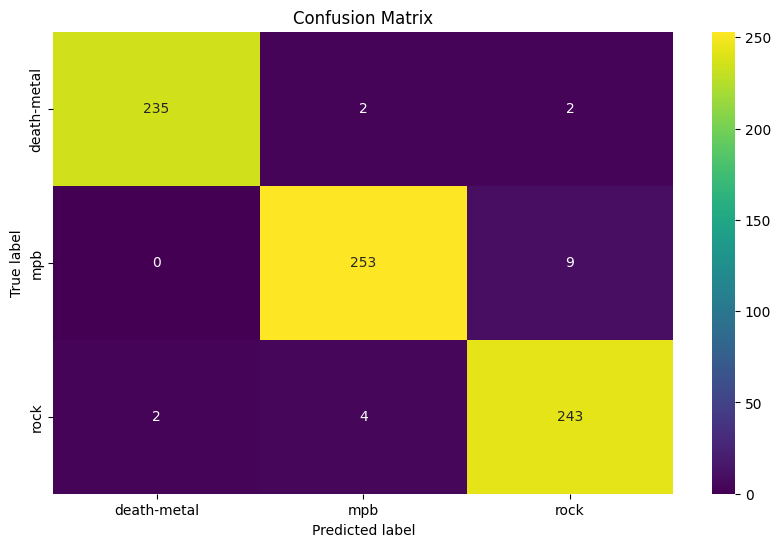

In [7]:
labels = sorted(set(y_test))

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True,
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()



In [13]:
print(X)

      popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0             66       151565         0         0.765   0.497    1    -7.806   
1             65        89293         0         0.720   0.422    1   -13.338   
2             49       259066         0         0.632   0.651    7    -8.658   
3             49       216446         0         0.610   0.420    4   -10.889   
4             50       273906         0         0.580   0.330    7   -13.703   
...          ...          ...       ...           ...     ...  ...       ...   
2995          20        91866         0         0.474   0.993    1    -5.850   
2996           0       227616         0         0.370   0.993    7    -4.465   
2997          21       162973         1         0.307   0.976    2    -3.552   
2998          22       135893         1         0.362   0.994    6    -1.722   
2999          22       206973         0         0.260   0.994   10    -5.291   

      mode  speechiness  acousticness  

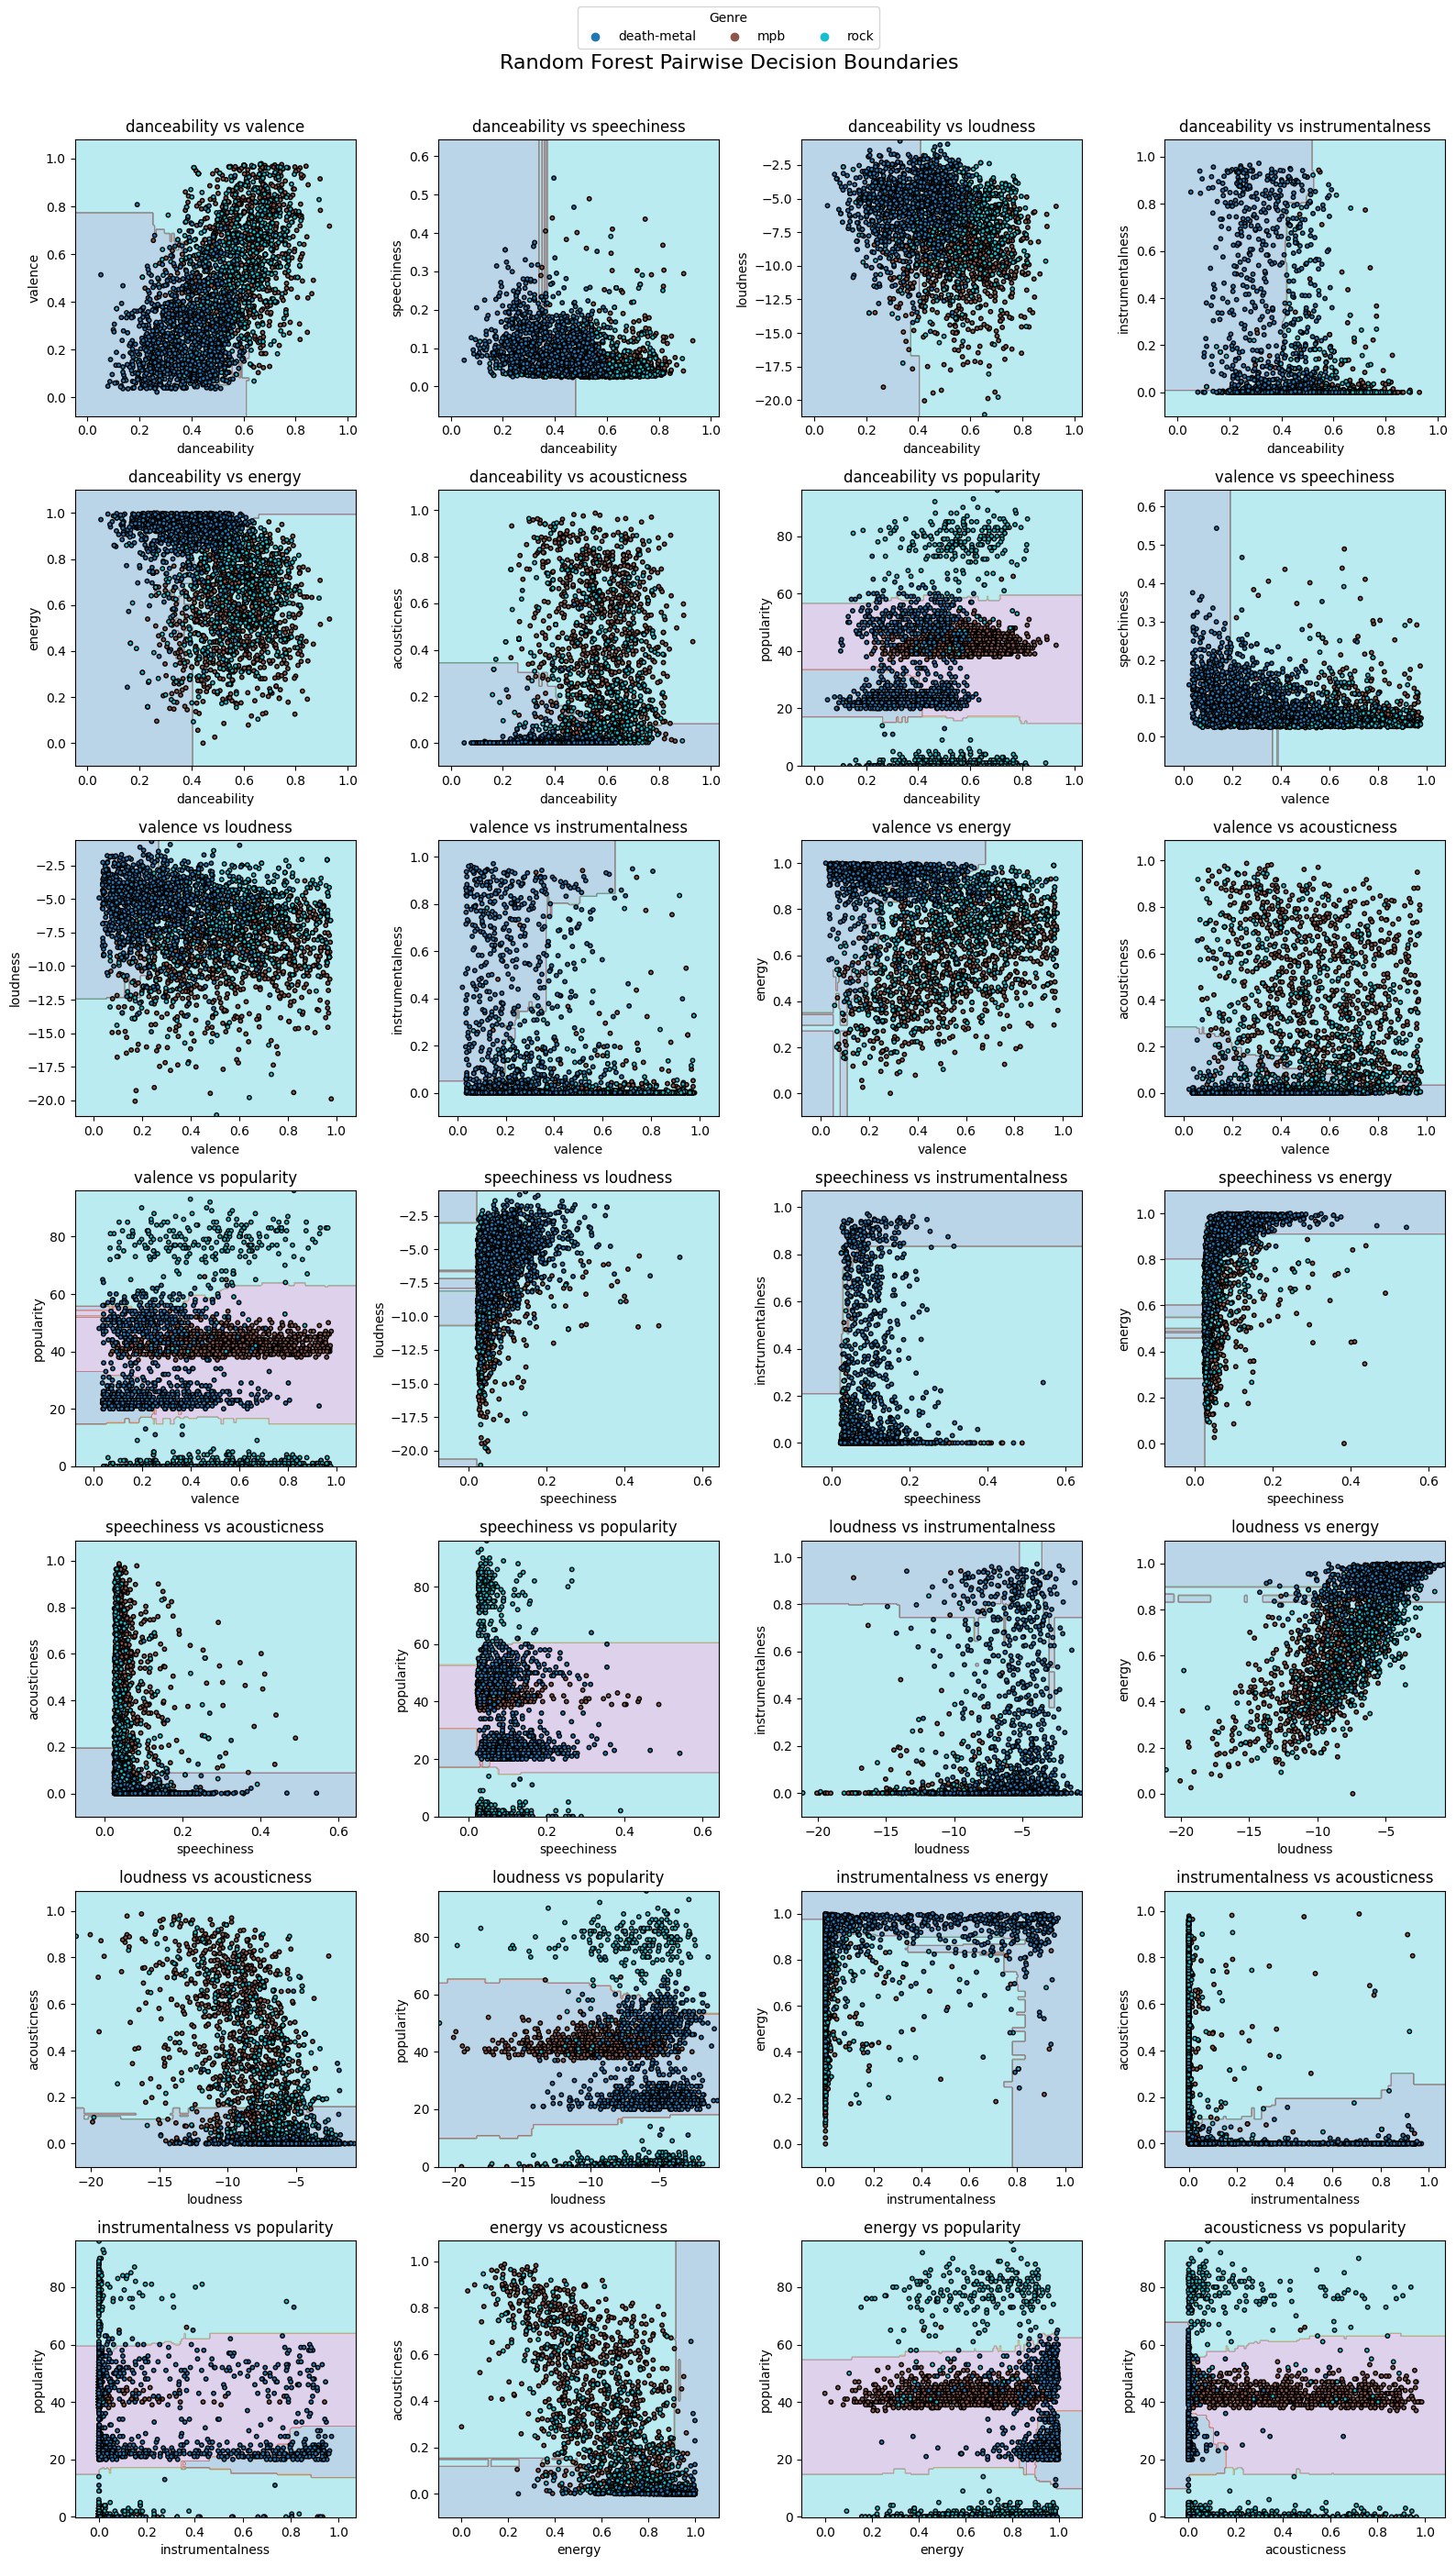

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from itertools import combinations

# Define features
features = ['danceability', 'valence', 'speechiness', 'loudness',
            'instrumentalness', 'energy', 'acousticness', 'popularity']

# Encode target genre
le = LabelEncoder()
y = le.fit_transform(df['track_genre'])

# Input features
X = df[features].values

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Create combinations of features
feature_pairs = list(combinations(range(len(features)), 2))
n_pairs = len(feature_pairs)

# Determine subplot grid size
n_cols = 4
n_rows = int(np.ceil(n_pairs / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each decision boundary
for idx, (i, j) in enumerate(feature_pairs):
    ax = axes[idx]
    
    x_min, x_max = X[:, i].min() - 0.1, X[:, i].max() + 0.1
    y_min, y_max = X[:, j].min() - 0.1, X[:, j].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Build full input with all features fixed to mean except i and j
    X_grid = np.tile(np.mean(X, axis=0), (xx.ravel().shape[0], 1))
    X_grid[:, i] = xx.ravel()
    X_grid[:, j] = yy.ravel()
    
    Z = rf.predict(X_grid).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
    scatter = ax.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.tab10, edgecolor='k', s=10)
    ax.set_xlabel(features[i])
    ax.set_ylabel(features[j])
    ax.set_title(f'{features[i]} vs {features[j]}')

# Hide unused subplots
for ax in axes[n_pairs:]:
    ax.set_visible(False)

# Add legend
handles, _ = scatter.legend_elements()
fig.legend(handles, le.classes_, title='Genre', loc='upper center', ncol=len(le.classes_))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Random Forest Pairwise Decision Boundaries', fontsize=16)
plt.show()


In [44]:
X2 = df.iloc[:, 6:20]
y2 = df["track_genre"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y2)
feature_names = X2.columns

# Train/test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_encoded, test_size=0.3, random_state=42)

# Train model
dtree_clf = DecisionTreeClassifier(max_depth=5)
dtree_clf.fit(X_train2, y_train2)


DecisionTreeClassifier(max_depth=5)

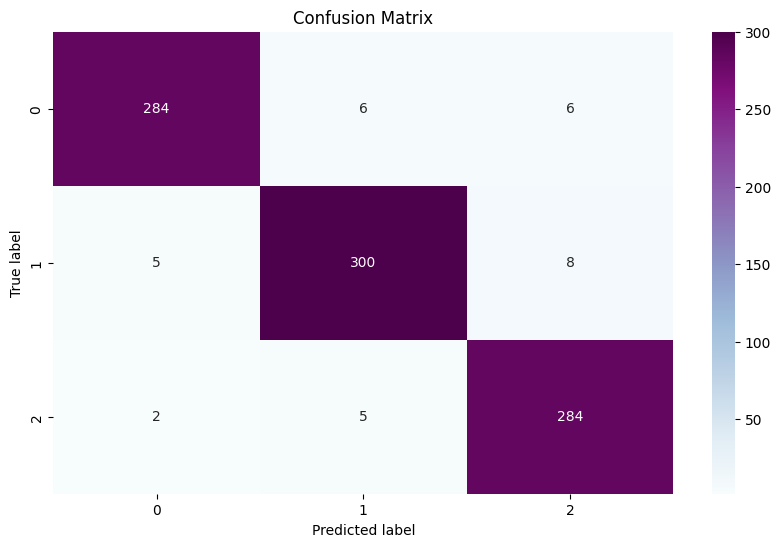

In [55]:

predict = dtree_clf.predict(X_test2)
labels = sorted(set(y_test2))
cm = confusion_matrix(y_test2, predict)
cm

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu", cbar=True,
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

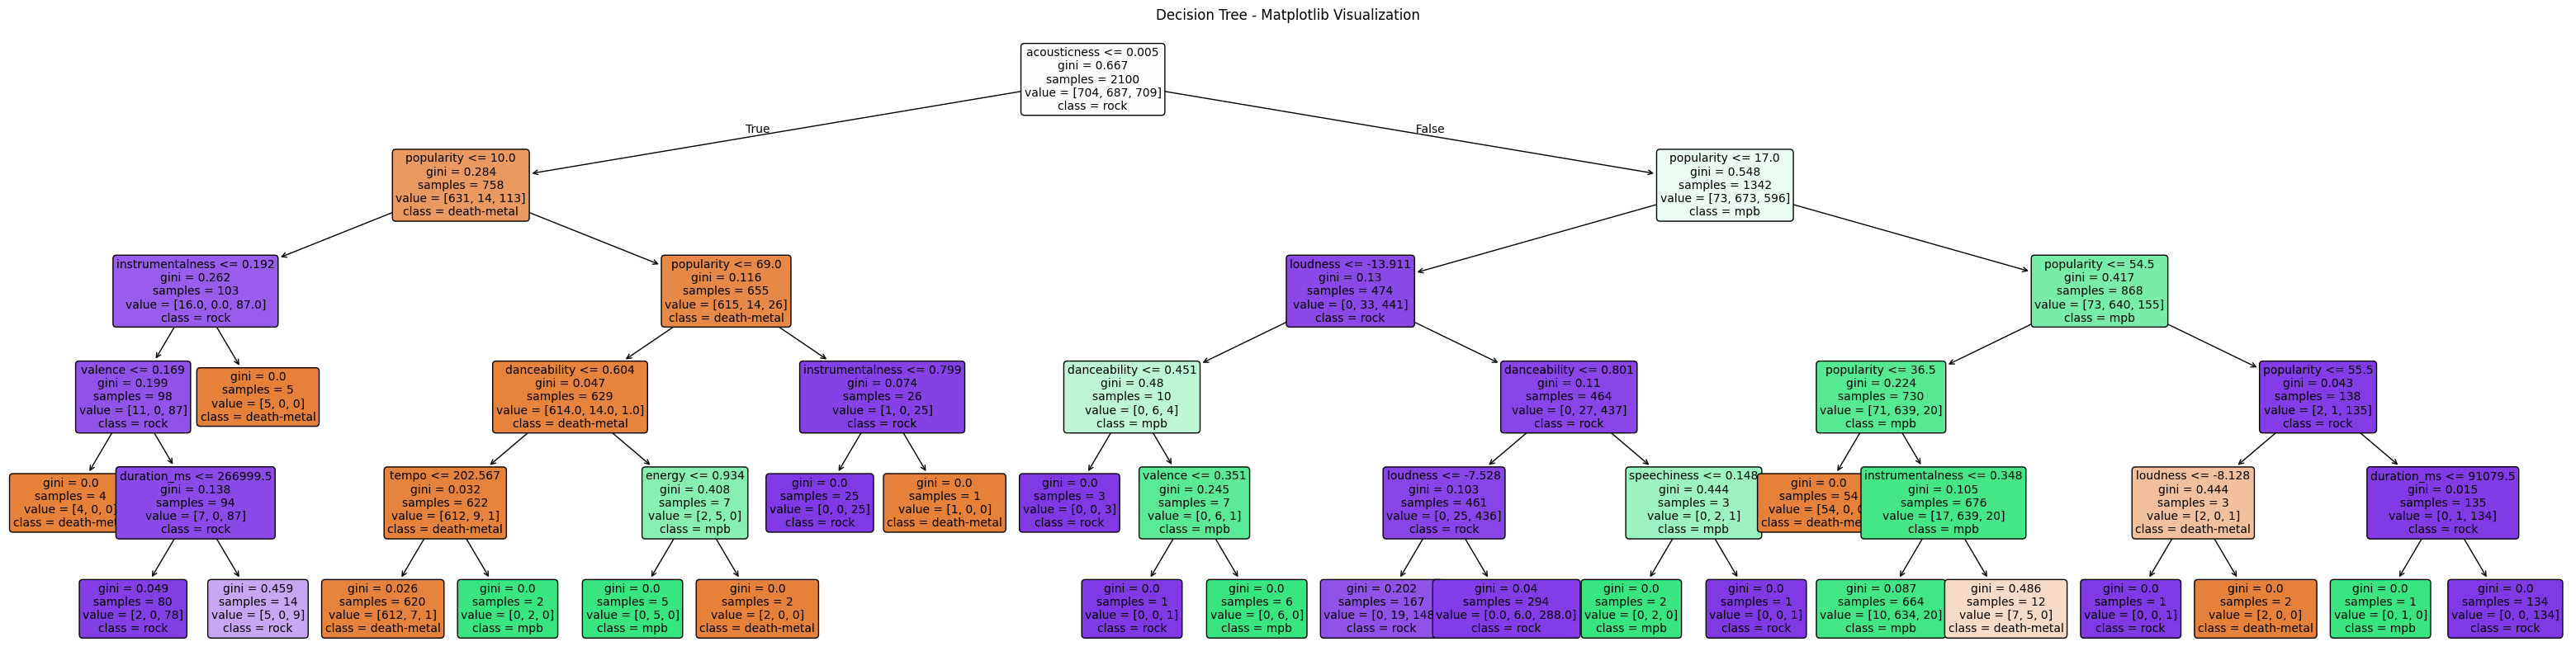

In [56]:


plt.figure(figsize=(40, 10))  
plot_tree(dtree_clf,
          feature_names=feature_names,
          class_names=le.classes_,  
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree - Matplotlib Visualization")
plt.show()
